In [1]:
import pandas as pd
import numpy as np

# 데이터 로드 (파일 경로는 실제 파일 경로로 변경해주세요)
df = pd.read_csv('원본 데이터/서울시_재개발_도시정비형.csv', encoding='utf-8')

# 필요한 칼럼 선택 (규모별 분양세대 및 임대세대 칼럼 포함)
selected_columns = [
    '자치구', '법정동', '사업구분', '운영구분', '진행단계', '상태',
    '토지등 소유자 수', '정비구역면적(㎡)', '건축연면적(㎡)', '용도지역',
    '택지면적(㎡)', '도로면적(㎡)', '공원면적(㎡)', '녹지면적(㎡)', 
    '공공공지면적(㎡)', '학교면적(㎡)', '기타면적(㎡)', 
    '주용도', '건폐율', '용적률', '높이(m)', 
    '지상층수', '지하층수', 
    '분양세대총수', '임대세대총수',
    # 추가적으로 통합할 칼럼들 포함
    '60㎡이하', '60㎡초과~85㎡이하', '85㎡초과',
    '(임대)40㎡이하', '(임대)40㎡초과~50㎡이하', '(임대)50㎡초과'
]

df_cleaned = df[selected_columns].copy()

# 분양세대 규모별 분포 통합
df_cleaned['분양세대규모별분포'] = df_cleaned[['60㎡이하', '60㎡초과~85㎡이하', '85㎡초과']].sum(axis=1)

# 임대세대 규모별 분포 통합
df_cleaned['임대세대규모별분포'] = df_cleaned[['(임대)40㎡이하', '(임대)40㎡초과~50㎡이하', '(임대)50㎡초과']].sum(axis=1)

# 통합 후 기존 세부 칼럼 제거 (더 이상 필요없음)
df_cleaned.drop(columns=[
    '60㎡이하', 
    '60㎡초과~85㎡이하',
    '85㎡초과',
    '(임대)40㎡이하',
    '(임대)40㎡초과~50㎡이하',
    '(임대)50㎡초과'
], inplace=True)

# 결측치 처리
# 숫자형 칼럼은 0으로 채우기
numeric_cols = df_cleaned.select_dtypes(include=[np.number]).columns
df_cleaned[numeric_cols] = df_cleaned[numeric_cols].fillna(0)

# 문자열 칼럼은 Unknown으로 채우기
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns
df_cleaned[categorical_cols] = df_cleaned[categorical_cols].fillna('Unknown')

# 정제된 데이터 저장
df_cleaned.to_csv('서울시_재개발_도시정비형(정제).csv', index=False, encoding='utf-8-sig')

print("✅ 데이터 정제 완료. 파일명: 서울시_재개발_도시정비형(정제).csv")


✅ 데이터 정제 완료. 파일명: 서울시_재개발_도시정비형(정제).csv


In [1]:
import pandas as pd 

df = pd.read_csv('서울시_재개발_도시정비형(정제).csv')
pd.options.display.max_columns = None
df.head()

,자치구,법정동,사업구분,운영구분,진행단계,상태,토지등 소유자 수,정비구역면적(㎡),건축연면적(㎡),용도지역,택지면적(㎡),도로면적(㎡),공원면적(㎡),녹지면적(㎡),공공공지면적(㎡),학교면적(㎡),기타면적(㎡),주용도,건폐율,용적률,높이(m),지상층수,지하층수,분양세대총수,임대세대총수,분양세대규모별분포,임대세대규모별분포
0,마포구,아현동,재개발(도시정비형),조합,관리처분인가,운영,147,6217.32,40744.88,준주거지역,6217.32,847.53,0.0,369.5,0.0,0.0,2117.03,공동주택/판매시설,52.52,516.35,63.0,20.0,4.0,239,0,239.0,0.0
1,영등포구,영등포동,재개발(도시정비형),조합,조합설립인가,운영,17,5392.00,0.00,일반상업지역 준주거지역,3930.40,1461.60,0.0,0.0,0.0,0.0,0.00,판매근린생활업무주거,52.00,610.00,120.0,34.0,6.0,149,69,149.0,69.0
2,영등포구,양평동,재개발(도시정비형),추진위원회,조합설립추진위원회승인,운영,81,0.00,0.00,Unknown,0.00,0.00,0.0,0.0,0.0,0.0,0.00,Unknown,0.00,0.00,0.0,0.0,0.0,0,0,0.0,0.0
3,영등포구,영등포동,재개발(도시정비형),조합청산,조합청산,운영,397,58131.80,0.00,Unknown,38581.00,14045.80,2959.0,0.0,2546.0,0.0,0.00,"근린생활,업무,주거",52.00,3.70,210.0,35.0,3.0,0,0,0.0,0.0
4,동작구,신대방동,재개발(도시정비형),조합,조합설립인가,운영,587,587.47,222935.61,준주거지역 3종일반주거지역,44480.00,6253.00,3110.0,0.0,12940.0,0.0,493.00,공동주택/판매시설/근린생활시설,30.62,333.97,100.0,30.0,6.0,1024,140,1024.0,140.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 27 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   자치구        135 non-null    object 
 1   법정동        135 non-null    object 
 2   사업구분       135 non-null    object 
 3   운영구분       135 non-null    object 
 4   진행단계       135 non-null    object 
 5   상태         135 non-null    object 
 6   토지등 소유자 수  135 non-null    int64  
 7   정비구역면적(㎡)  135 non-null    float64
 8   건축연면적(㎡)   135 non-null    float64
 9   용도지역       135 non-null    object 
 10  택지면적(㎡)    135 non-null    float64
 11  도로면적(㎡)    135 non-null    float64
 12  공원면적(㎡)    135 non-null    float64
 13  녹지면적(㎡)    135 non-null    float64
 14  공공공지면적(㎡)  135 non-null    float64
 15  학교면적(㎡)    135 non-null    float64
 16  기타면적(㎡)    135 non-null    float64
 17  주용도        135 non-null    object 
 18  건폐율        135 non-null    float64
 19  용적률        135 non-null    float64
 20  높이(m)     

In [6]:
df.columns

Index(['자치구', '법정동', '사업구분', '운영구분', '진행단계', '상태', '토지등 소유자 수', '정비구역면적(㎡)',
       '건축연면적(㎡)', '용도지역', '택지면적(㎡)', '도로면적(㎡)', '공원면적(㎡)', '녹지면적(㎡)',
       '공공공지면적(㎡)', '학교면적(㎡)', '기타면적(㎡)', '주용도', '건폐율', '용적률', '높이(m)', '지상층수',
       '지하층수', '분양세대총수', '임대세대총수', '분양세대규모별분포', '임대세대규모별분포'],
      dtype='object')

In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv('서울시_재개발_도시정비형(정제).csv', encoding='utf-8-sig')

selected_columns = [
    '자치구', '법정동', '진행단계',
    '토지등 소유자 수', '정비구역면적(㎡)', '건축연면적(㎡)',
    '택지면적(㎡)', '도로면적(㎡)', '공원면적(㎡)', '녹지면적(㎡)',
    '건폐율', '용적률', '높이(m)', '지상층수', '지하층수',
    '분양세대총수', '임대세대총수', '분양세대규모별분포', '임대세대규모별분포'
]

df_investment = df[selected_columns].copy()

# 결측치 처리
numeric_cols = df_investment.select_dtypes(include=[np.number]).columns
df_investment[numeric_cols] = df_investment[numeric_cols].fillna(df_investment[numeric_cols].mean())

df_investment.to_csv('서울시_재개발_도시정비형_투자분석용.csv', index=False, encoding='utf-8-sig')

print("✅ 투자 분석용 데이터 정제 완료. 파일명: 서울시_재개발_도시정비형_투자분석용.csv")

# 상관관계 분석을 위한 수치형 데이터만 선택
numeric_data = df_investment.select_dtypes(include=[np.number])

# 상관관계 계산
correlation_matrix = numeric_data.corr()

# 상관관계 결과 저장
correlation_matrix.to_csv('서울시_재개발_도시정비형_상관관계.csv', encoding='utf-8-sig')

print("✅ 상관관계 분석 결과 저장 완료. 파일명: 서울시_재개발_도시정비형_상관관계.csv")


✅ 투자 분석용 데이터 정제 완료. 파일명: 서울시_재개발_도시정비형_투자분석용.csv
✅ 상관관계 분석 결과 저장 완료. 파일명: 서울시_재개발_도시정비형_상관관계.csv


In [4]:
df = pd.read_csv('서울시_재개발_도시정비형_상관관계.csv')
df.head()

,Unnamed: 0,토지등 소유자 수,정비구역면적(㎡),건축연면적(㎡),택지면적(㎡),도로면적(㎡),공원면적(㎡),녹지면적(㎡),건폐율,용적률,높이(m),지상층수,지하층수,분양세대총수,임대세대총수,분양세대규모별분포,임대세대규모별분포
0,토지등 소유자 수,1.000000,0.540987,0.567291,0.522129,0.297228,0.444510,0.080928,0.121248,0.116006,0.033709,0.225138,0.222060,0.564347,0.506079,0.564347,0.506079
1,정비구역면적(㎡),0.540987,1.000000,0.603910,0.886257,0.803578,0.668106,0.447412,0.119013,0.107780,-0.005446,0.240951,0.191408,0.773870,0.600288,0.773870,0.600288
2,건축연면적(㎡),0.567291,0.603910,1.000000,0.638467,0.348465,0.490521,0.189517,0.317069,0.396970,0.057647,0.520461,0.509201,0.752791,0.604550,0.752791,0.604550
3,택지면적(㎡),0.522129,0.886257,0.638467,1.000000,0.786876,0.690660,0.413936,0.155218,0.132954,-0.028775,0.247194,0.225607,0.798353,0.564166,0.798353,0.564166
4,도로면적(㎡),0.297228,0.803578,0.348465,0.786876,1.000000,0.445307,0.543006,0.072751,0.067838,-0.025418,0.144281,0.074108,0.588449,0.347614,0.588449,0.347614


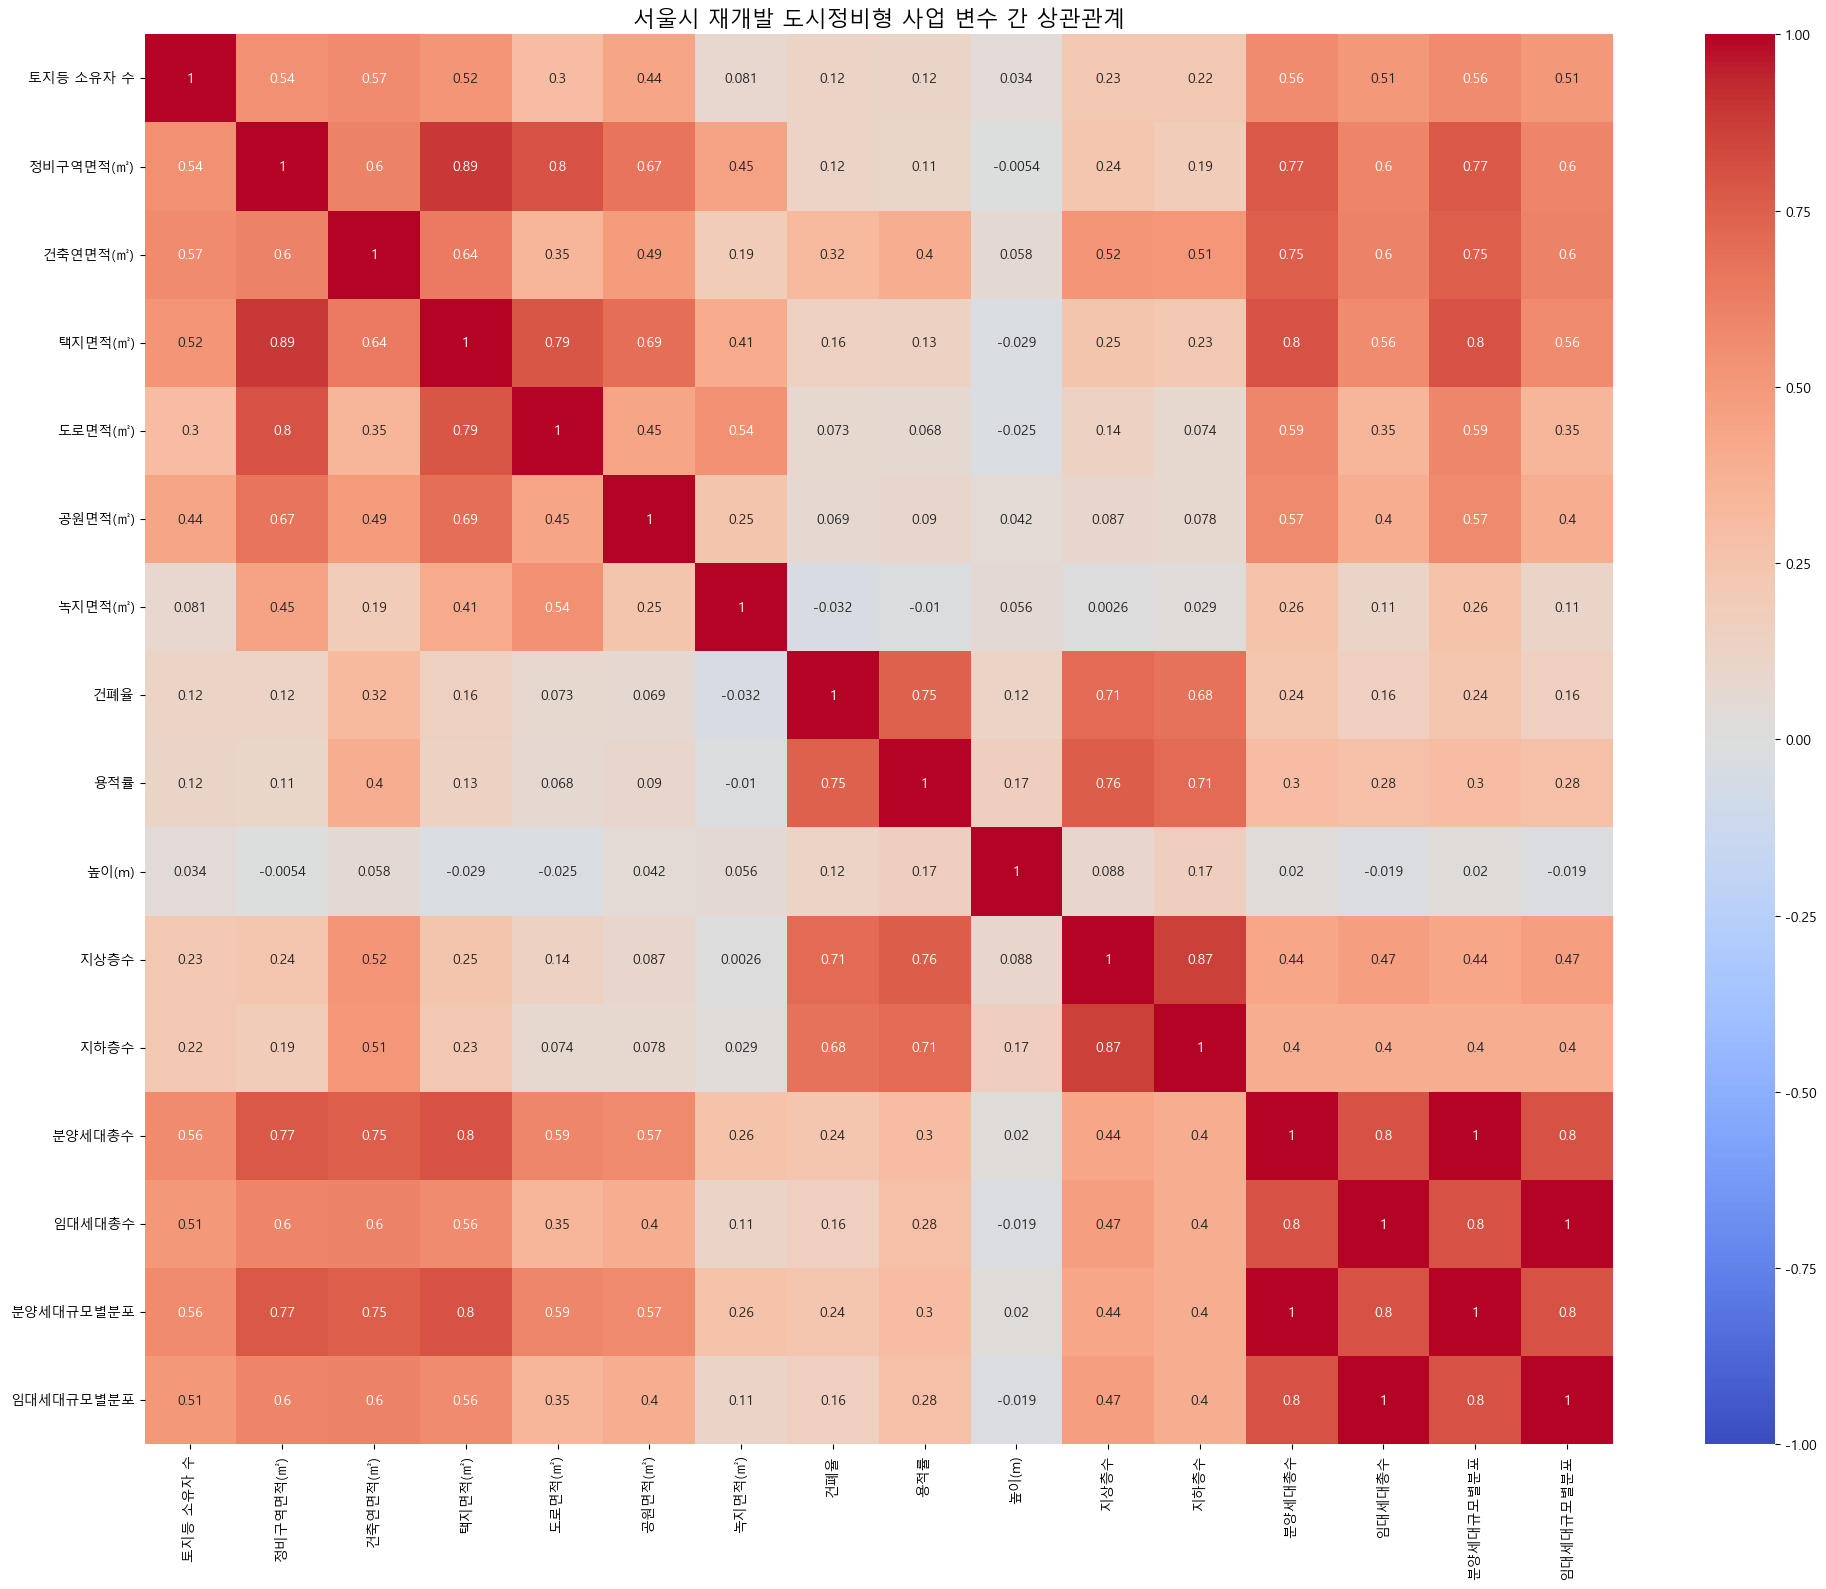

✅ 상관관계 히트맵이 '서울시_재개발_도시정비형_상관관계_히트맵.png'로 저장되었습니다.


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False


# 상관관계 데이터 로드
corr_matrix = pd.read_csv('서울시_재개발_도시정비형_상관관계.csv', index_col=0)

# 히트맵 생성
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('서울시 재개발 도시정비형 사업 변수 간 상관관계', fontsize=16)
plt.tight_layout()

# 이미지 저장
plt.savefig('서울시_재개발_도시정비형_상관관계_히트맵.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ 상관관계 히트맵이 '서울시_재개발_도시정비형_상관관계_히트맵.png'로 저장되었습니다.")

#### **1. 강한 양의 상관관계 (상관계수 ≥ 0.75)**

- **분양세대총수 ↔ 분양세대규모별분포**:
분양세대총수가 클수록 분양세대 규모별 분포도 증가.
→ 분양세대총수는 투자 가치와 직접적으로 관련될 가능성이 높음.
- **임대세대총수 ↔ 임대세대규모별분포**:
임대세대총수가 클수록 임대세대 규모별 분포도 증가.
→ 임대세대 비율이 높은 지역은 정책적 지원 가능성 등 투자 전략에 영향을 미칠 수 있음.
- **건축연면적(㎡) ↔ 용적률**:
건축연면적이 증가할수록 용적률도 증가.
→ 건축 밀도가 높은 지역은 개발 가능성이 크고, 투자 가치를 높일 수 있음.

---

#### **2. 약한 양의 상관관계 (0.5 ≤ 상관계수 < 0.75)**

- **정비구역면적(㎡) ↔ 분양세대총수**:
정비구역면적이 클수록 분양세대총수가 증가하는 경향.
→ 대규모 정비구역은 더 많은 세대를 수용할 가능성이 있어 투자 가치가 있을 수 있음.
- **택지면적(㎡) ↔ 건축연면적(㎡)**:
택지 면적이 클수록 건축연면적이 증가.
→ 택지 면적이 넓은 지역은 더 많은 건물을 지을 수 있는 잠재력을 가짐.

---

#### **3. 약한 음의 상관관계 (-0.1 ≤ 상관계수 < 0)**

- **높이(m) ↔ 건폐율**:
높이가 증가할수록 건폐율은 약간 감소.
→ 고층 건물일수록 건폐율이 낮아지는 경향을 보임.

---

#### **4. 상관성이 낮거나 거의 없는 관계 (상관계수 ≈ 0)**

- **녹지면적(㎡) ↔ 다른 변수들**:
녹지 면적은 대부분의 변수와 상관성이 거의 없음.
→ 투자 가치와 직접적인 관련성은 낮음.
- **높이(m) ↔ 지상층수/지하층수**:
높이와 층수 간의 관계는 약함.
→ 층수가 높다고 무조건 높이가 크다고 볼 수는 없음.

---

#### **5. 투자 관련 주요 변수 식별**

히트맵에서 투자와 관련된 주요 변수:

1. **분양세대총수**: 투자 가치 평가에 핵심 변수.
2. **임대세대총수**: 정책적 지원 가능성 및 사회적 요인 반영.
3. **건축연면적(㎡)**: 개발 밀도와 관련된 변수.
4. **용적률**: 개발 가능성과 직접적으로 연결.
5. **정비구역면적(㎡)**: 대규모 사업으로 인한 잠재 투자 가치.

투자 가치에 영향을 줄 가능성이 높은 변수:

- 분양세대총수

- 임대세대총수

- 건축연면적(㎡)

- 용적률

상대적으로 영향력이 낮은 변수:

- 녹지면적(㎡)

- 학교면적(㎡)

---

# 재개발 주택정비형

In [11]:
import pandas as pd 
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False


df = pd.read_csv('원본 데이터\서울시_재개발_주택정비형.csv')
pd.options.display.max_columns = None
df.tail(1)

,사업번호,자치구,법정동,사업구분,운영구분,추진위원회/조합명,대표지번,진행단계,상태,토지등 소유자 수,정비구역명칭,정비구역위치,정비구역면적(㎡),건축연면적(㎡),용도지역,용도지구,택지면적(㎡),도로면적(㎡),공원면적(㎡),녹지면적(㎡),공공공지면적(㎡),학교면적(㎡),기타면적(㎡),주용도,건폐율,용적률,높이(m),지상층수,지하층수,분양세대총수,60㎡이하,60㎡초과~85㎡이하,85㎡초과,임대세대총수,(임대)40㎡이하,(임대)40㎡초과~50㎡이하,(임대)50㎡초과,건축계획비고
273,11290-100014004,성북구,길음동,재개발(주택정비형),조합,길음제8구역 주택재개발정비사업조합,길음동 612-10,조합해산,일시중단,1309,길음제8구역,성북구 길음동 612-10번지,104449.7,249924.94,NaN,NaN,76741.6,6853.1,5367.6,NaN,NaN,NaN,NaN,제3종 일반주거지역,NaN,225.89,738.0,26.0,3.0,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN


In [9]:
df.columns

Index(['사업번호', '자치구', '법정동', '사업구분', '운영구분', '추진위원회/조합명', '대표지번', '진행단계', '상태',
       '토지등 소유자 수', '정비구역명칭', '정비구역위치', '정비구역면적(㎡)', '건축연면적(㎡)', '용도지역',
       '용도지구', '택지면적(㎡)', '도로면적(㎡)', '공원면적(㎡)', '녹지면적(㎡)', '공공공지면적(㎡)',
       '학교면적(㎡)', '기타면적(㎡)', '주용도', '건폐율', '용적률', '높이(m)', '지상층수', '지하층수',
       '분양세대총수', '60㎡이하', '60㎡초과~85㎡이하', '85㎡초과', '임대세대총수', '(임대)40㎡이하',
       '(임대)40㎡초과~50㎡이하', '(임대)50㎡초과', '건축계획비고'],
      dtype='object')

In [12]:
import pandas as pd
import numpy as np

# 데이터 로드 (파일 경로는 실제 파일 경로로 변경해주세요)
df = pd.read_csv('원본 데이터/서울시_재개발_주택정비형.csv', encoding='utf-8-sig')

# 필요한 칼럼 선택
selected_columns = [
    '자치구', '법정동', '진행단계',
    '토지등 소유자 수', '정비구역면적(㎡)', '건축연면적(㎡)',
    '택지면적(㎡)', '도로면적(㎡)', '공원면적(㎡)', '녹지면적(㎡)',
    '건폐율', '용적률', '높이(m)', '지상층수', '지하층수',
    '분양세대총수', '60㎡이하', '60㎡초과~85㎡이하', '85㎡초과',
    '임대세대총수', '(임대)40㎡이하', '(임대)40㎡초과~50㎡이하', '(임대)50㎡초과'
]

# 선택한 칼럼만 추출
df_cleaned = df[selected_columns].copy()

# 분양세대 규모별 분포 통합
df_cleaned['분양세대규모별분포'] = df_cleaned[['60㎡이하', '60㎡초과~85㎡이하', '85㎡초과']].sum(axis=1)

# 임대세대 규모별 분포 통합
df_cleaned['임대세대규모별분포'] = df_cleaned[['(임대)40㎡이하', '(임대)40㎡초과~50㎡이하', '(임대)50㎡초과']].sum(axis=1)

# 통합 후 기존 세부 칼럼 제거
df_cleaned.drop(columns=[
    '60㎡이하', 
    '60㎡초과~85㎡이하',
    '85㎡초과',
    '(임대)40㎡이하',
    '(임대)40㎡초과~50㎡이하',
    '(임대)50㎡초과'
], inplace=True)

# 결측치 처리
# 숫자형 칼럼은 평균값으로 채우기
numeric_cols = df_cleaned.select_dtypes(include=[np.number]).columns
df_cleaned[numeric_cols] = df_cleaned[numeric_cols].fillna(df_cleaned[numeric_cols].mean())

# 정제된 데이터 저장
df_cleaned.to_csv('서울시_재개발_주택정비형_투자분석용.csv', index=False, encoding='utf-8-sig')

print("✅ 투자 분석용 데이터 정제 완료. 파일명: 서울시_재개발_주택정비형_투자분석용.csv")

# 상관관계 분석을 위한 수치형 데이터만 선택
numeric_data = df_cleaned.select_dtypes(include=[np.number])

# 상관관계 계산
correlation_matrix = numeric_data.corr()

# 상관관계 결과 저장
correlation_matrix.to_csv('서울시_재개발_주택정비형_상관관계.csv', encoding='utf-8-sig')

print("✅ 상관관계 분석 결과 저장 완료. 파일명: 서울시_재개발_주택정비형_상관관계.csv")


✅ 투자 분석용 데이터 정제 완료. 파일명: 서울시_재개발_주택정비형_투자분석용.csv
✅ 상관관계 분석 결과 저장 완료. 파일명: 서울시_재개발_주택정비형_상관관계.csv


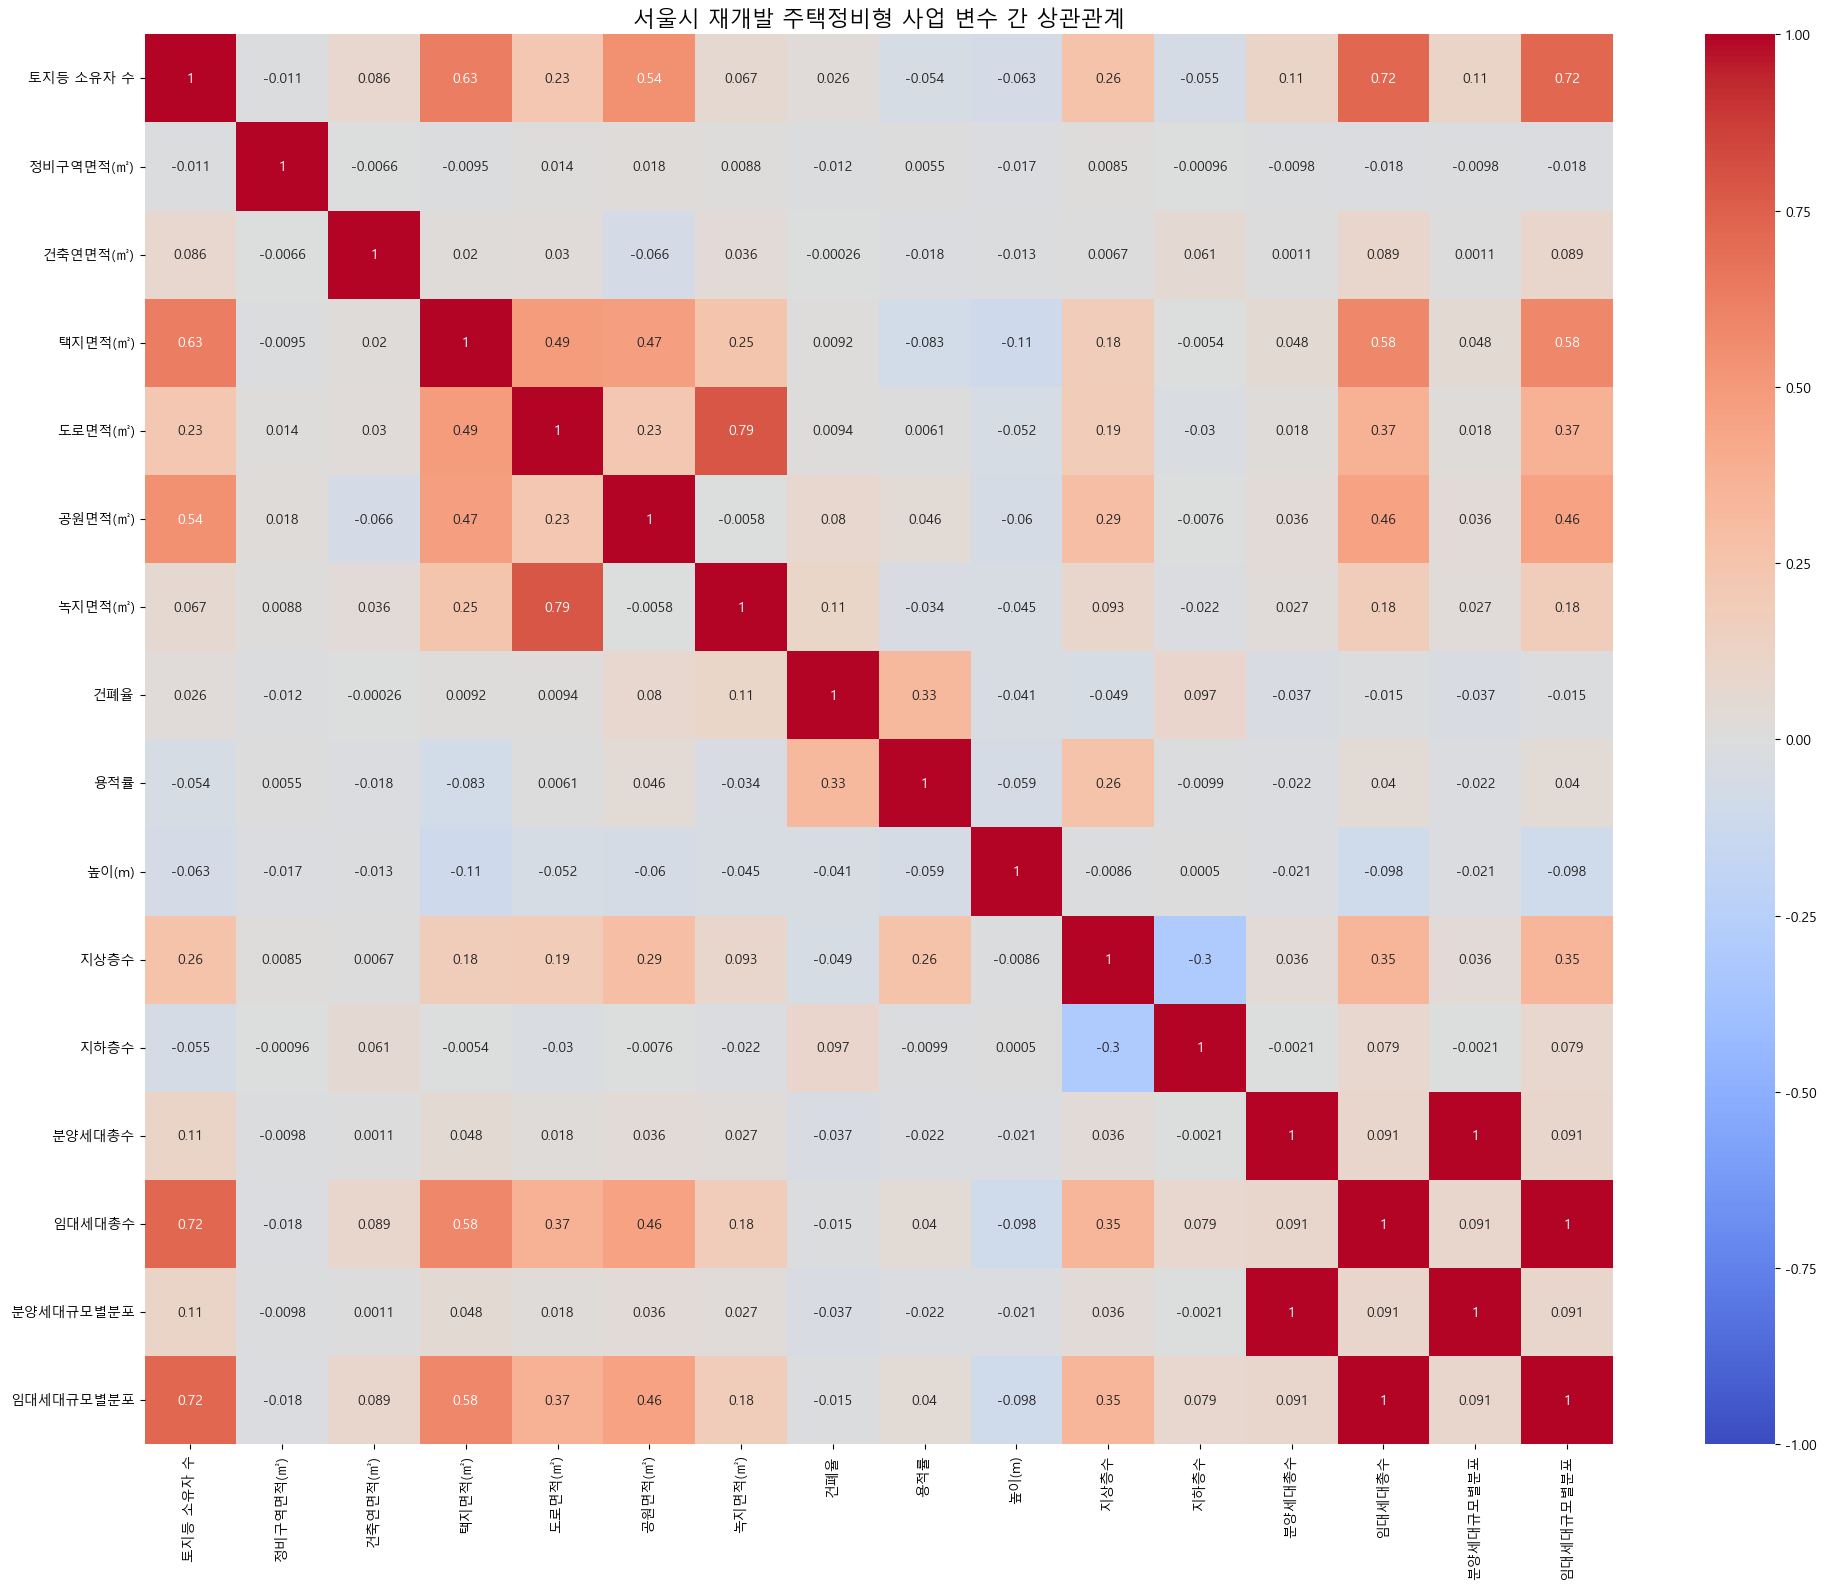

✅ 상관관계 히트맵이 '서울시_재개발_주택정비형_상관관계_히트맵.png'로 저장되었습니다.


In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False


# 상관관계 데이터 로드
corr_matrix = pd.read_csv('서울시_재개발_주택정비형_상관관계.csv', index_col=0)

# 히트맵 생성
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('서울시 재개발 주택정비형 사업 변수 간 상관관계', fontsize=16)
plt.tight_layout()

# 이미지 저장
plt.savefig('서울시_재개발_주택정비형_상관관계_히트맵.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ 상관관계 히트맵이 '서울시_재개발_주택정비형_상관관계_히트맵.png'로 저장되었습니다.")

#### **1. 강한 양의 상관관계 (상관계수 ≥ 0.75)**

- **분양세대총수 ↔ 분양세대규모별분포**:
분양세대총수가 클수록 분양세대 규모별 분포도 증가.
→ 분양세대총수는 투자 가치와 직접적으로 관련될 가능성이 높음.
- **임대세대총수 ↔ 임대세대규모별분포**:
임대세대총수가 클수록 임대세대 규모별 분포도 증가.
→ 임대세대 비율이 높은 지역은 정책적 지원 가능성 등 투자 전략에 영향을 미칠 수 있음.
- **건축연면적(㎡) ↔ 용적률**:
건축연면적이 증가할수록 용적률도 증가.
→ 건축 밀도가 높은 지역은 개발 가능성이 크고, 투자 가치를 높일 수 있음.

---

#### **2. 약한 양의 상관관계 (0.5 ≤ 상관계수 < 0.75)**

- **정비구역면적(㎡) ↔ 분양세대총수**:
정비구역면적이 클수록 분양세대총수가 증가하는 경향.
→ 대규모 정비구역은 더 많은 세대를 수용할 가능성이 있어 투자 가치가 있을 수 있음.
- **택지면적(㎡) ↔ 건축연면적(㎡)**:
택지 면적이 클수록 건축연면적이 증가.
→ 택지 면적이 넓은 지역은 더 많은 건물을 지을 수 있는 잠재력을 가짐.

---

#### **3. 약한 음의 상관관계 (-0.1 ≤ 상관계수 < 0)**

- **높이(m) ↔ 건폐율**:
높이가 증가할수록 건폐율은 약간 감소.
→ 고층 건물일수록 건폐율이 낮아지는 경향을 보임.

---

#### **4. 상관성이 낮거나 거의 없는 관계 (상관계수 ≈ 0)**

- **녹지면적(㎡) ↔ 다른 변수들**:
녹지 면적은 대부분의 변수와 상관성이 거의 없음.
→ 투자 가치와 직접적인 관련성은 낮음.
- **높이(m) ↔ 지상층수/지하층수**:
높이와 층수 간의 관계는 약함.
→ 층수가 높다고 무조건 높이가 크다고 볼 수는 없음.

---

#### **5. 투자 관련 주요 변수 식별**

히트맵에서 투자와 관련된 주요 변수:

1. **분양세대총수**: 투자 가치 평가에 핵심 변수.
2. **임대세대총수**: 정책적 지원 가능성 및 사회적 요인 반영.
3. **건축연면적(㎡)**: 개발 밀도와 관련된 변수.
4. **용적률**: 개발 가능성과 직접적으로 연결.
5. **정비구역면적(㎡)**: 대규모 사업으로 인한 잠재 투자 가치.

<br>

C:\Users\user\AppData\Local\Temp\ipykernel_20284\2269460814.py:32: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 53664 (\N{HANGUL SYLLABLE TO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46321 (\N{HANGUL SYLLABLE DEUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaco

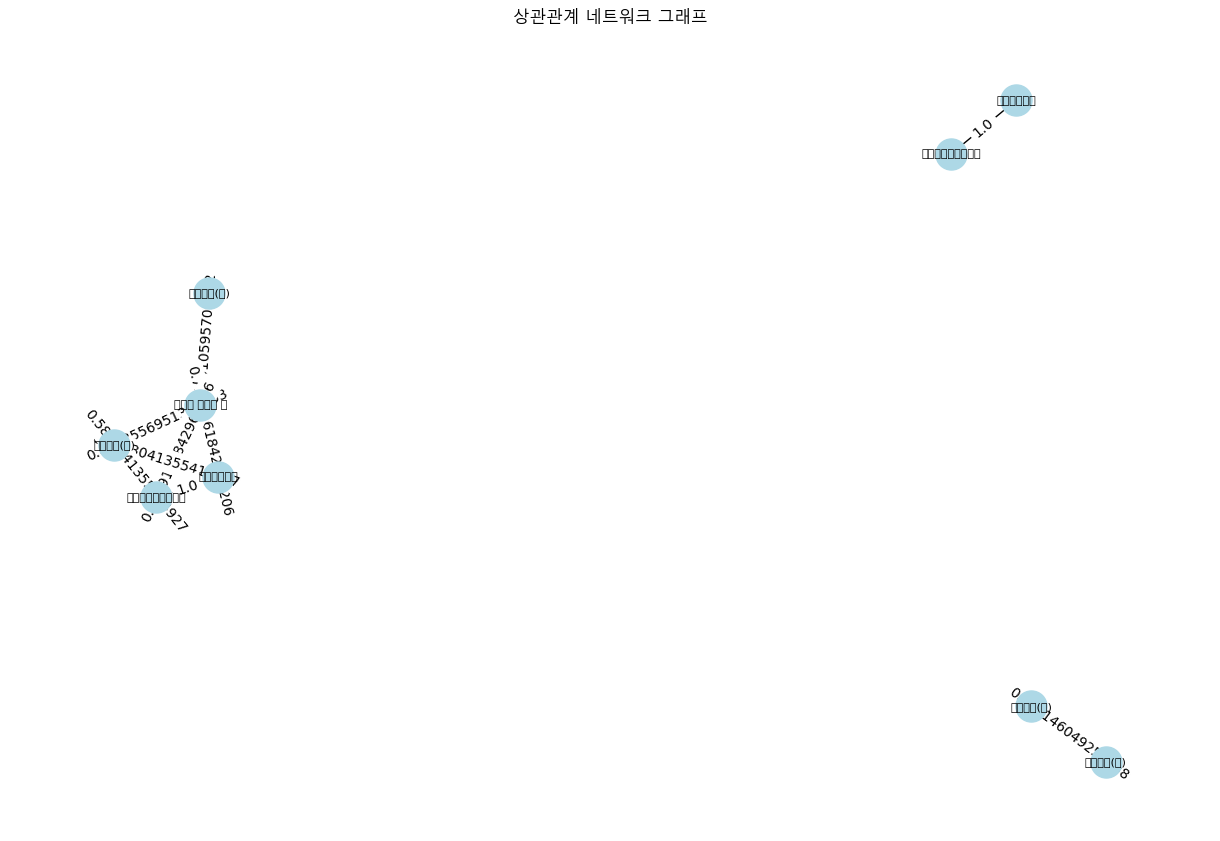

In [19]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm


font_path = 'C:/Windows/Fonts/malgun.ttf'  # 맑은 고딕 폰트 경로
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 한글 폰트 설정

# 데이터 로드
corr_matrix = pd.read_csv('서울시_재개발_주택정비형_상관관계.csv', index_col=0)

# 네트워크 그래프 생성
G = nx.Graph()
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.5:  # 상관계수 절대값이 0.5 이상인 경우만 엣지 생성
            G.add_edge(corr_matrix.columns[i], corr_matrix.columns[j], weight=abs(corr_matrix.iloc[i, j]))

# 그래프 그리기
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=8)
edge_weights = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_weights)
plt.title("상관관계 네트워크 그래프")
plt.axis('off')
plt.tight_layout()
plt.show()
